In [4]:
import tensorflow as tf
import numpy as np
import os,pathlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [5]:
from time import time
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Layer,InputSpec,Dense,Input
from tensorflow.keras import Model
from tensorflow.keras import callbacks
from tensorflow.keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,normalized_mutual_info_score,adjusted_rand_score
import os,pathlib

In [6]:
def preprocess_data(dataset):
    all_images = []
    all_labels = []
    for image,label in dataset:
        preprocessed_image = tf.keras.applications.vgg16.preprocess_input(image)
        all_images.append(preprocessed_image)
        all_labels.append(label)
    return np.concatenate(all_images),np.concatenate(all_labels)

In [8]:
class ClusteringLayer(Layer):

    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=2)
    
    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_dim))
        self.clusters = self.add_weight(shape=(self.n_clusters, input_dim), 
                                        initializer='glorot_uniform', 
                                        name='clusters')
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True
    
    def call(self, inputs, **kwargs):

        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1)) # Make sure each sample's 10 values add up to 1.
        return q
    
    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.n_clusters
    
    def get_config(self):
        config = {'n_clusters': self.n_clusters}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [9]:
model_0_dec = tf.keras.models.load_model('vgg_r_0.00_dec.keras',custom_objects={"ClusteringLayer": ClusteringLayer})

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [10]:
base_dir = pathlib.Path('chest_xray2')
test_dataset = tf.keras.utils.image_dataset_from_directory(base_dir/'unlabel',
                                                            image_size=(224,224),
                                                            batch_size=32)
test_images,test_labels = preprocess_data(test_dataset)

Found 1000 files belonging to 2 classes.


In [11]:
feature = tf.keras.layers.GlobalAveragePooling2D()(model_0_dec.get_layer('block4_conv2').output)
encoder_0_dec = tf.keras.Model(inputs=model_0_dec.input,outputs=feature)
X = encoder_0_dec.predict(test_images)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [12]:
kmeans = KMeans(n_clusters=2, n_init=20)
y_pred = kmeans.fit_predict(X)
acc = accuracy_score(test_labels,y_pred)
print(acc)

0.832


In [13]:
feature = tf.keras.layers.GlobalAveragePooling2D()(model_0_dec.get_layer('block4_conv3').output)
encoder_0_dec = tf.keras.Model(inputs=model_0_dec.input,outputs=feature)
X = encoder_0_dec.predict(test_images)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [15]:
kmeans = KMeans(n_clusters=2, n_init=20)
y_pred = kmeans.fit_predict(X)
acc = accuracy_score(test_labels,y_pred)
print(acc)

0.841


In [16]:
feature = tf.keras.layers.GlobalAveragePooling2D()(model_0_dec.get_layer('block4_pool').output)
encoder_0_dec = tf.keras.Model(inputs=model_0_dec.input,outputs=feature)
X = encoder_0_dec.predict(test_images)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [18]:
kmeans = KMeans(n_clusters=2, n_init=20)
y_pred = kmeans.fit_predict(X)
acc = accuracy_score(test_labels,y_pred)
print(acc)

0.844


In [19]:
feature = tf.keras.layers.GlobalAveragePooling2D()(model_0_dec.get_layer('block5_conv1').output)
encoder_0_dec = tf.keras.Model(inputs=model_0_dec.input,outputs=feature)
X = encoder_0_dec.predict(test_images)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [20]:
kmeans = KMeans(n_clusters=2, n_init=20)
y_pred = kmeans.fit_predict(X)
acc = accuracy_score(test_labels,y_pred)
print(acc)

0.849


In [31]:
feature = [0.817,0.832,0.841,0.844,0.849]
layer = ['b4_c1','b4_c2','b4_c3','b4_pool','b5_c1']

In [32]:
feature_acc = [0.795,0.812,0.809,0.793,0.777,0.825,0.805,0.797,0.797,0.824,0.814,0.779,0.809]
layer_n = ['b2_pool','b3_c1','b3_c2','b3_c3','b3_pool','b4_c1','b4_c2','b4_c3','b4_pool','b5_c1','b5_c2','b5_c3','b5_pool']

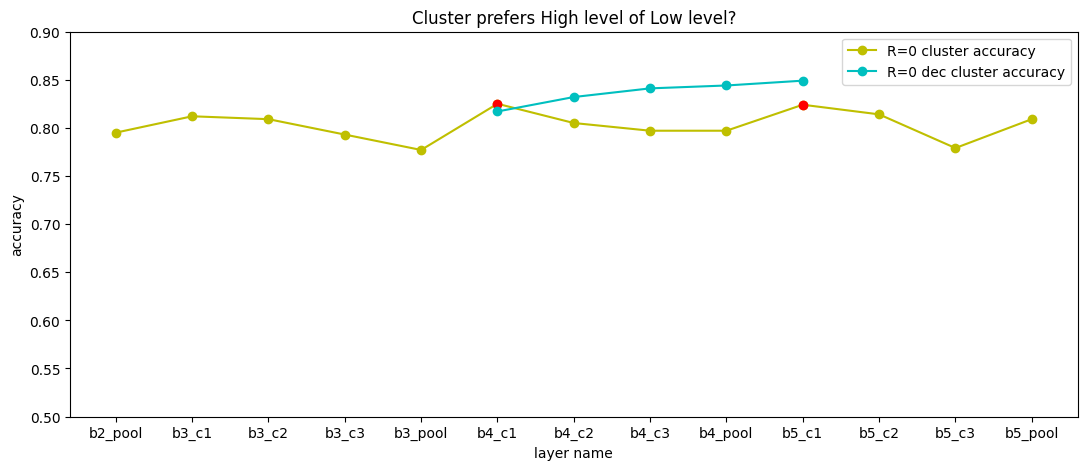

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,5))
plt.plot(layer_n,feature_acc,linestyle='-',marker='o',color='y',label='R=0 cluster accuracy')
plt.plot('b4_c1',0.825,marker='o',color='r')
plt.plot('b5_c1',0.824,marker='o',color='r')
plt.plot(layer,feature,linestyle='-',marker='o',color='c',label='R=0 dec cluster accuracy')
plt.xlabel('layer name')
plt.ylabel('accuracy')
plt.ylim((0.5,0.9))

plt.title('Cluster prefers High level of Low level?')
plt.legend()
plt.show()